# sobel and canny

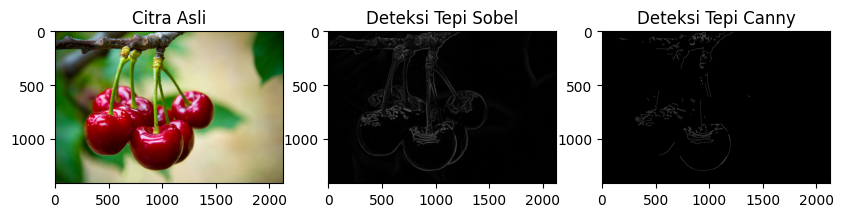

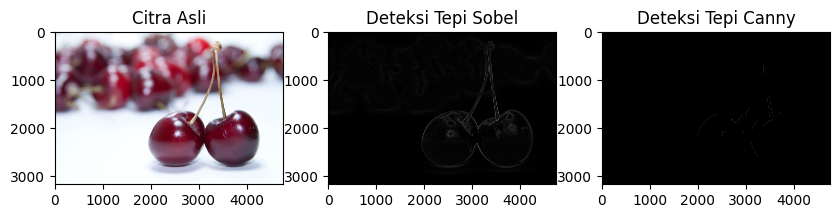

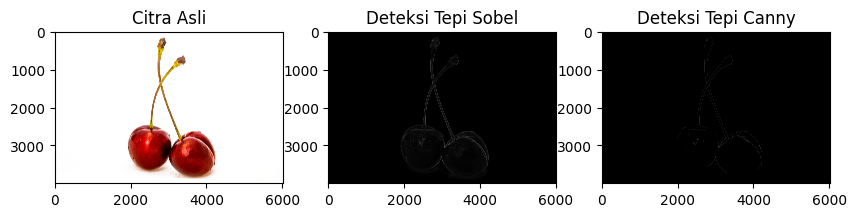

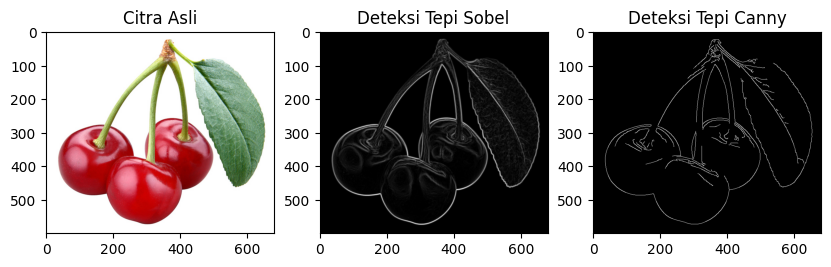

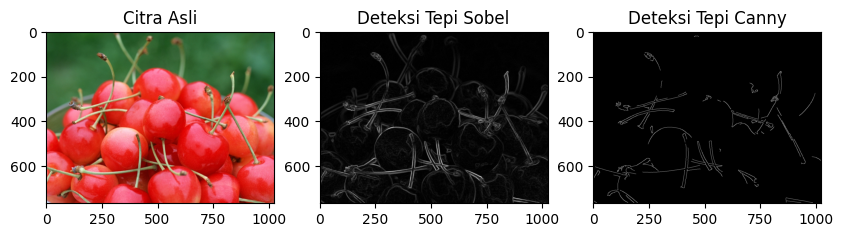

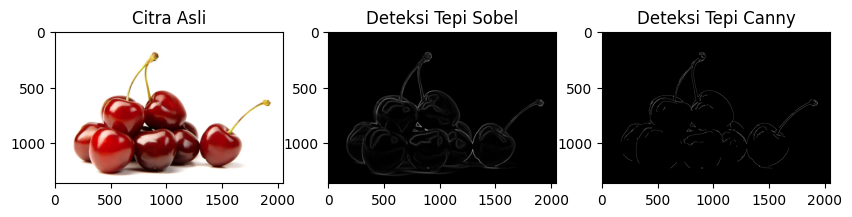

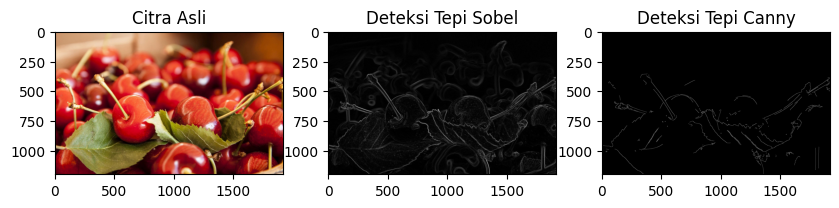

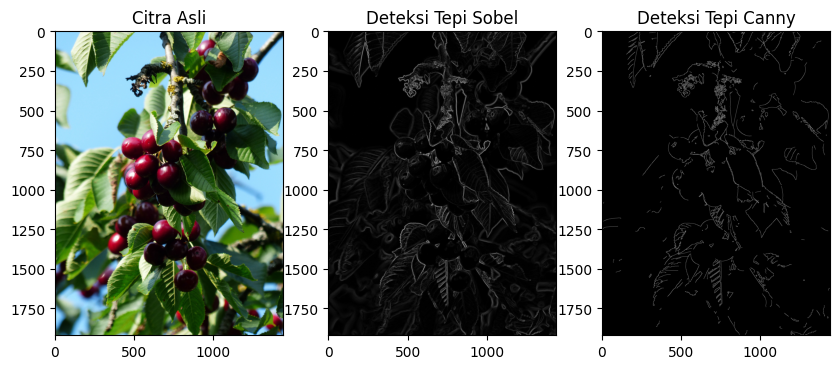

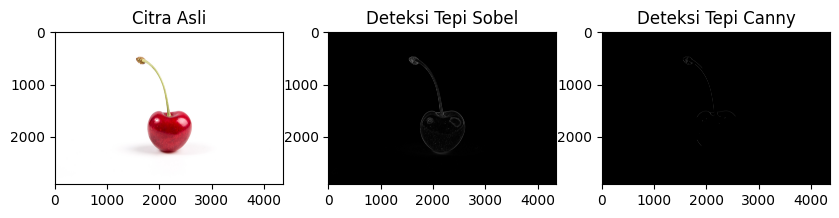

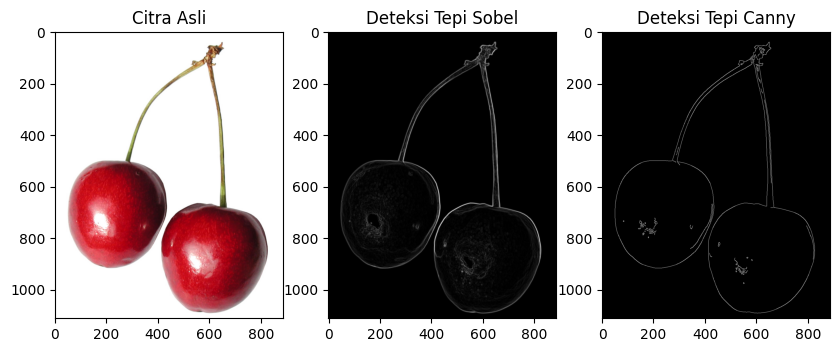

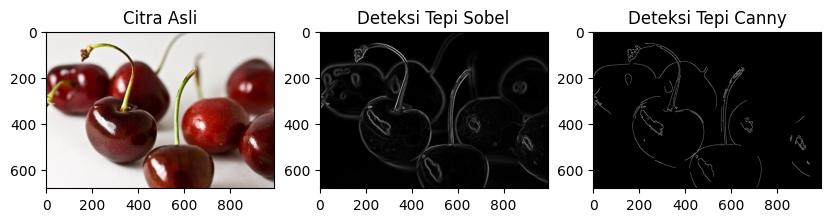

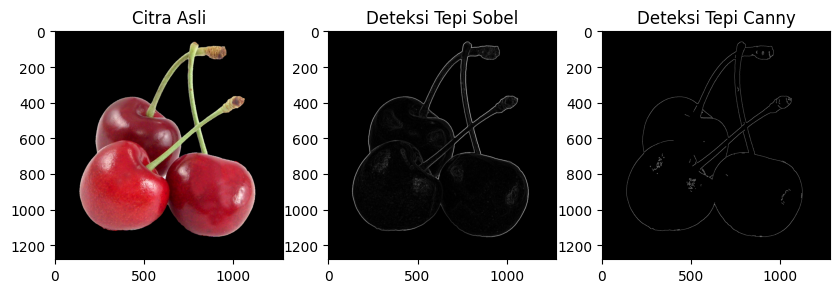

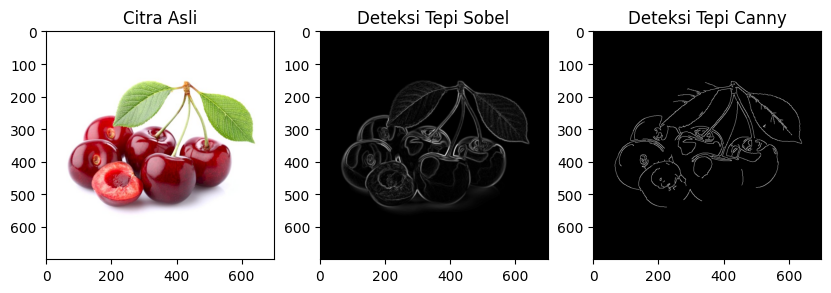

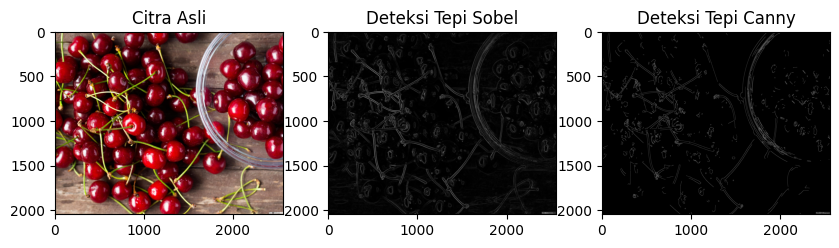

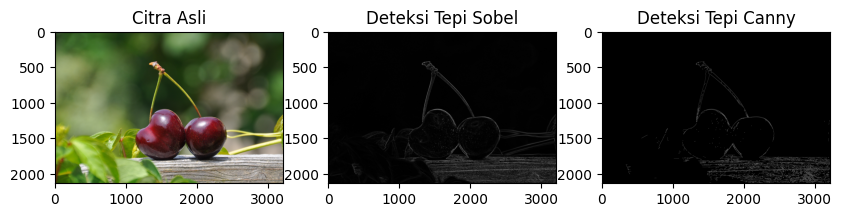

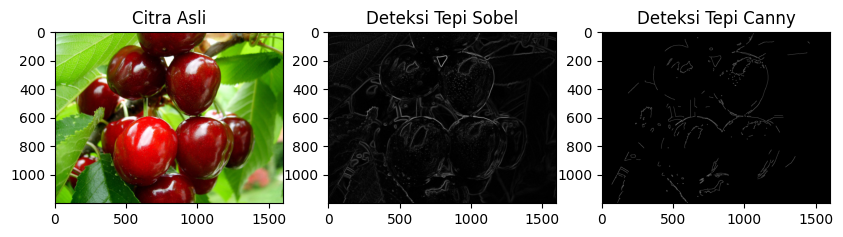

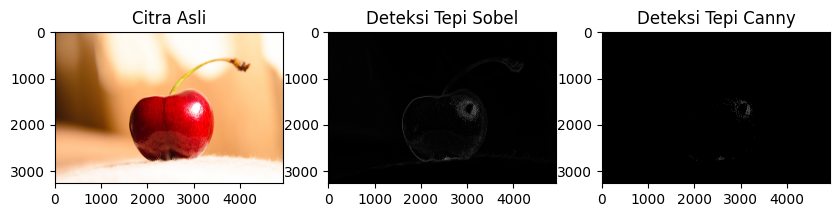

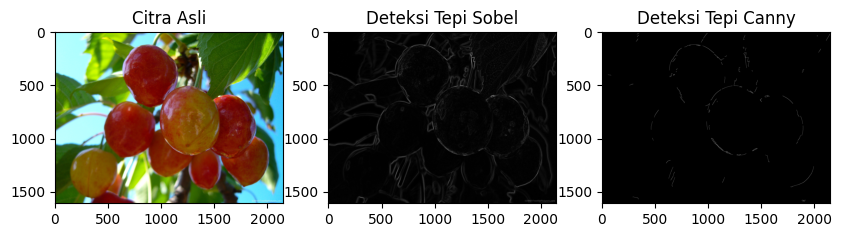

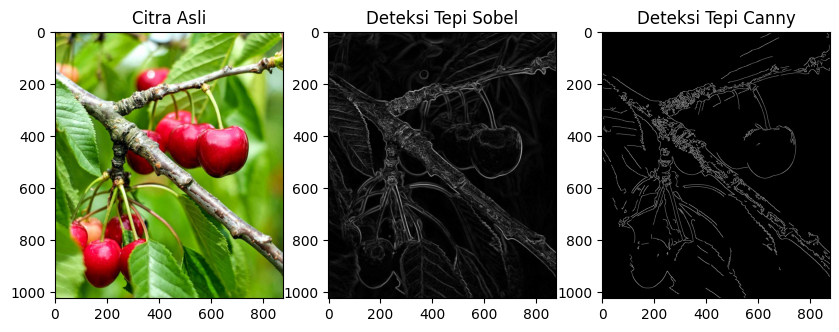

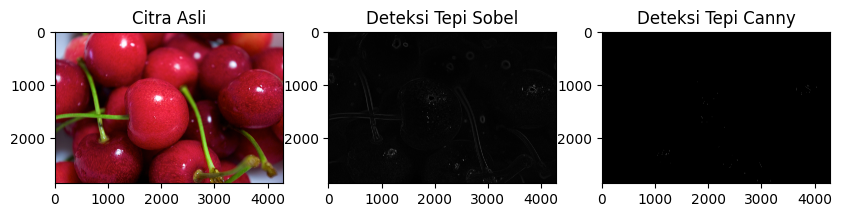

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cherry"

# fitur looping untuk membaca semua gambar di dalam folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

        #2. Deteksi tepi dengan Sobel
        sobelx = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)
        sobel = np.hypot(sobelx, sobely)
        sobel_normalized = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        canny_edges = cv2.Canny(blurred_img, 100, 200)

        #4. Tampilkan hasil
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.title("Citra Asli")
        plt.imshow(img_rgb)

        plt.subplot(1, 3, 2)
        plt.title("Deteksi Tepi Sobel")
        plt.imshow(sobel_normalized, cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title("Deteksi Tepi Canny")
        plt.imshow(canny_edges, cmap='gray')

        plt.show()

# global thresholding

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cherry"

# fitur looping untuk membaca semua gambar di dalam folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        _, thresholded_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb, cmap='gray')
        plt.title('gambar asli')

        plt.subplot(1, 2, 2)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title('hasil threshold global')
        plt.show()

# segmentasi warna dengan thresholding

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

folder_path = "cherry"

# fitur looping untuk membaca semua gambar di dalam folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        #2. Tentukan rentang warna untuk segmentasi
        #Contoh: Segmentasi warna merah rendah
        lower_red = np.array([0, 120, 70]) # Rentang bawah dalam HSV
        upper_red = np.array([10, 255, 255]) # Rentang atas dalam HSV

        #Contoh: Segmentasi warna merah rendah
        lower_red1 = np.array([170, 120, 70]) # Rentang bawah dalam HSV
        upper_red1 = np.array([180, 255, 255]) # Rentang atas dalam HSV

        #3. Segmentasi dengan Thresholding
        mask1 = cv2.inRange(hsv_img, lower_red, upper_red)
        mask2 = cv2.inRange(hsv_img, lower_red1, upper_red1)

        mask = mask1+mask2


        #4. Hasil segmentasi (aplikasikan mask ke citra asli)
        segmented_img = cv2.bitwise_and(image, image, mask=mask)

        #5. Tampilkan hasil
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Citra Asli")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title("Hasil Segmentasi Warna Merah")
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))

        plt.show()

# adaptive thresholding

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = "cherry"

# fitur looping untuk membaca semua gambar di dalam folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        _, otsu_thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Foto asli")
        plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.imshow(otsu_thresh_image, cmap='gray')
        plt.title('Otsu Thresholding')
        plt.show()